In [1]:
# Importing packages

import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [2]:
# Importing data

data = pd.read_excel('/Users/artsvik/Desktop/MA/data/smartphone_data.xlsx', sheet_name="Data", engine="openpyxl") 
print(data)

    Year   Count
0   2009   61.49
1   2010   81.63
2   2011  107.20
3   2012  138.20
4   2013  165.80
5   2014  190.30
6   2015  217.30
7   2016  241.90
8   2017  259.50
9   2018  274.10
10  2019  287.80
11  2020  296.80
12  2021  302.00
13  2022  307.00
14  2023  311.80
15  2024  316.20


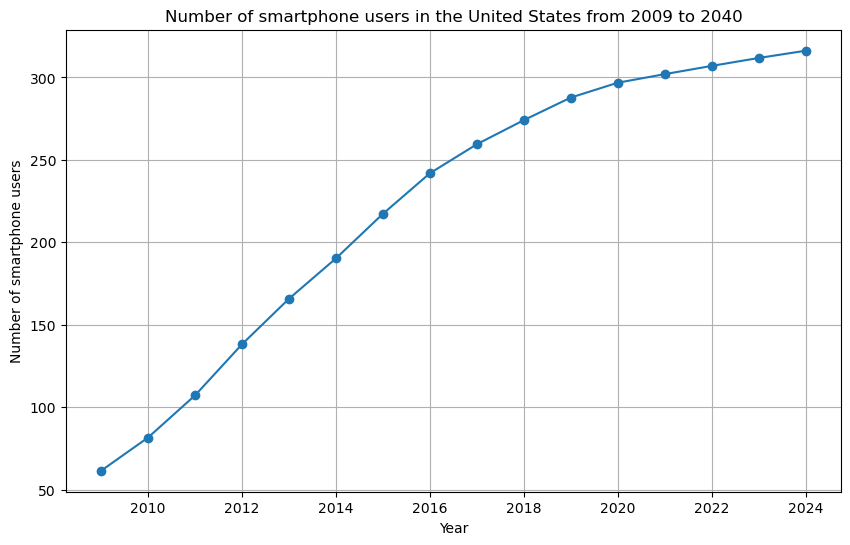

In [3]:
# Plotting the data

plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Count'], marker='o')
plt.title('Number of smartphone users in the United States from 2009 to 2040')
plt.xlabel('Year')
plt.ylabel('Number of smartphone users')
plt.grid(True)
plt.show()

In [4]:
# Function of bass model

from utility_functions import bass_model

In [5]:
# Normalizing years to start from 0

data['Year'] -= data['Year'].min()  

In [6]:
# Estimation of parameters

params, _ = opt.curve_fit(bass_model, data['Year'], data['Count'], p0=[0.03, 0.38, 16000])
p, q, M = params
print(f"Estimated parameters are: p={p:.4f}, q={q:.4f}, M={M:.2f}")

Estimated parameters are: p=0.0143, q=0.1898, M=82.21


In [7]:
# Prediction of Bass Model

years_future = np.arange(0, 15)
predicted = bass_model(years_future, p, q, M)

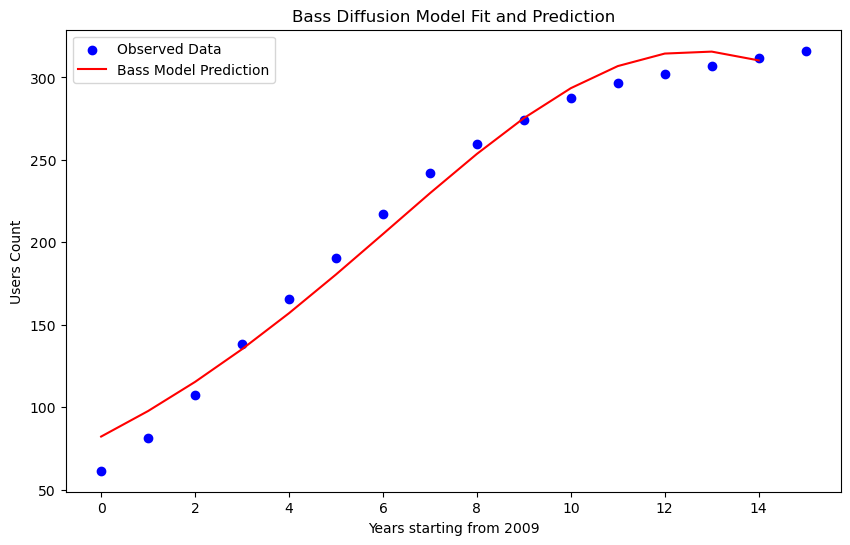

In [8]:
# Comparision between Observes Data and Bass Model Prediction

plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Count'], label='Observed Data', color='blue')
plt.plot(years_future, predicted, label='Bass Model Prediction', color='red')
plt.xlabel('Years starting from 2009')
plt.ylabel('Users Count')
plt.legend()
plt.title('Bass Diffusion Model Fit and Prediction')
plt.show()